# IND320 - Assignment 1

Name: Eskil Torp Skogsholm 

GitHub link:

Streamlit app: https://ind320-assignments-esksko-d9kb5eancdgnpkvsbewu86.streamlit.app/


## AI usage

Add content

Add content

Add content

Add content

## Log

Add content

Add content

Add content

Add content

In [48]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Reading weather data and printing the first few rows to see its structure
df = pd.read_csv("../data/open-meteo-subset.csv")

# Converting "time" column to datetime format 
df["time"] = pd.to_datetime(df["time"])

# First 5 rows of the dataset
df.head()

# Print dataset info
print("\nDataset Info:")
print(df.info())

df.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    8760 non-null   datetime64[ns]
 1   temperature_2m (°C)     8760 non-null   float64       
 2   precipitation (mm)      8760 non-null   float64       
 3   wind_speed_10m (m/s)    8760 non-null   float64       
 4   wind_gusts_10m (m/s)    8760 non-null   float64       
 5   wind_direction_10m (°)  8760 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 410.8 KB
None


,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284


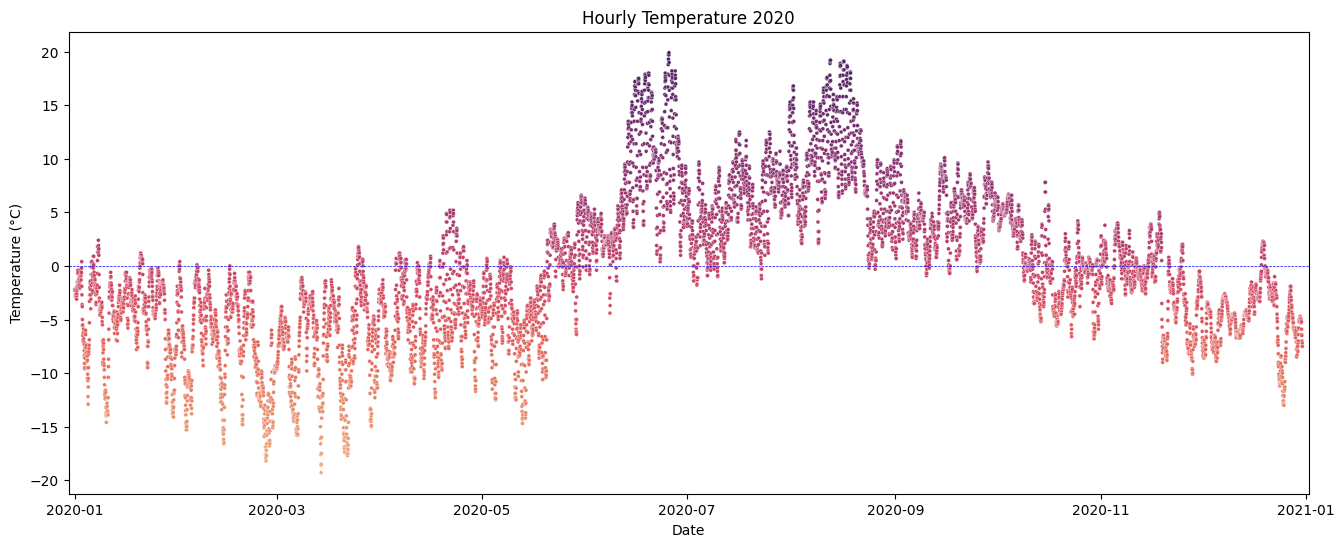

In [24]:
# Plotting temperature_2m (°C)
plt.figure(figsize=(16, 6)) 

sns.scatterplot(data=df, x="time", y="temperature_2m (°C)", hue="temperature_2m (°C)", palette="flare", legend=None, alpha=1, label="Hourly Temperature", s=8)
plt.title("Hourly Temperature 2020")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.margins(x=0.005)
plt.axhline(0, color='blue', linestyle='--', linewidth=0.5)


     month  total_precipitation
0  2020-01                315.8
1  2020-02                288.8
2  2020-03                192.7
3  2020-04                118.9
4  2020-05                 86.6


C:\Users\esksk\AppData\Local\Temp\ipykernel_15548\955257594.py:17: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue_r'` for the same effect.

  sns.barplot(


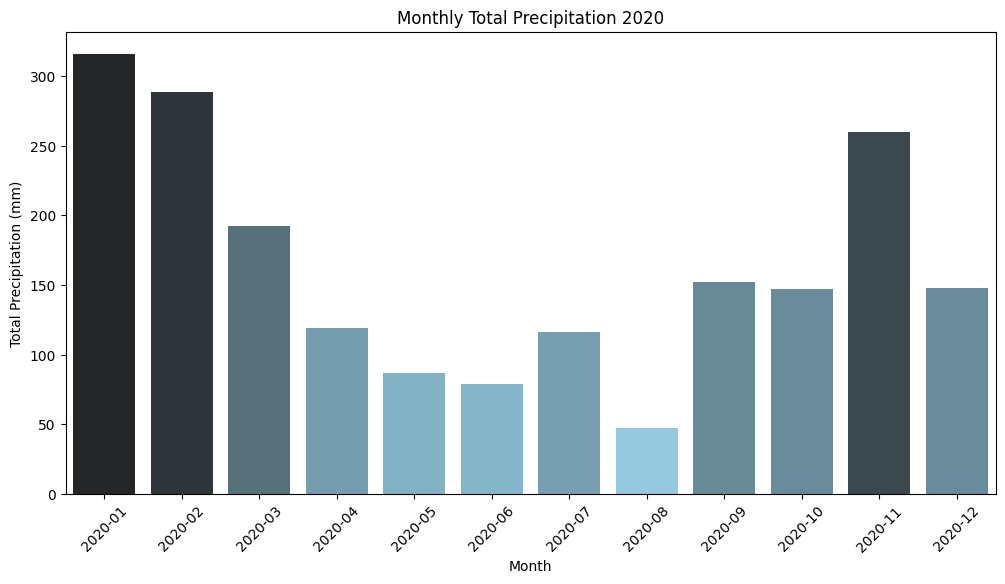

In [25]:
# Group by month instead of day
monthly_precipitation = (df.groupby(df["time"].dt.to_period("M"))["precipitation (mm)"].sum().reset_index())

# Convert back to timestamp for plotting
monthly_precipitation["time"] = monthly_precipitation["time"].dt.to_timestamp()

# Rename for clarity
monthly_precipitation = monthly_precipitation.rename(
    columns={"time": "month", "precipitation (mm)": "total_precipitation"}
)
monthly_precipitation["month"] = monthly_precipitation["month"].dt.strftime("%Y-%m")

print(monthly_precipitation.head())

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_precipitation,
    x="month",
    y="total_precipitation",
    color="skyblue_r",
    hue="total_precipitation",
)
plt.title("Monthly Total Precipitation 2020")
plt.xlabel("Month")
plt.ylabel("Total Precipitation (mm)")
plt.xticks(rotation=45)  # rotate labels for readability
plt.legend().remove()  # remove legend for cleaner look
plt.show()


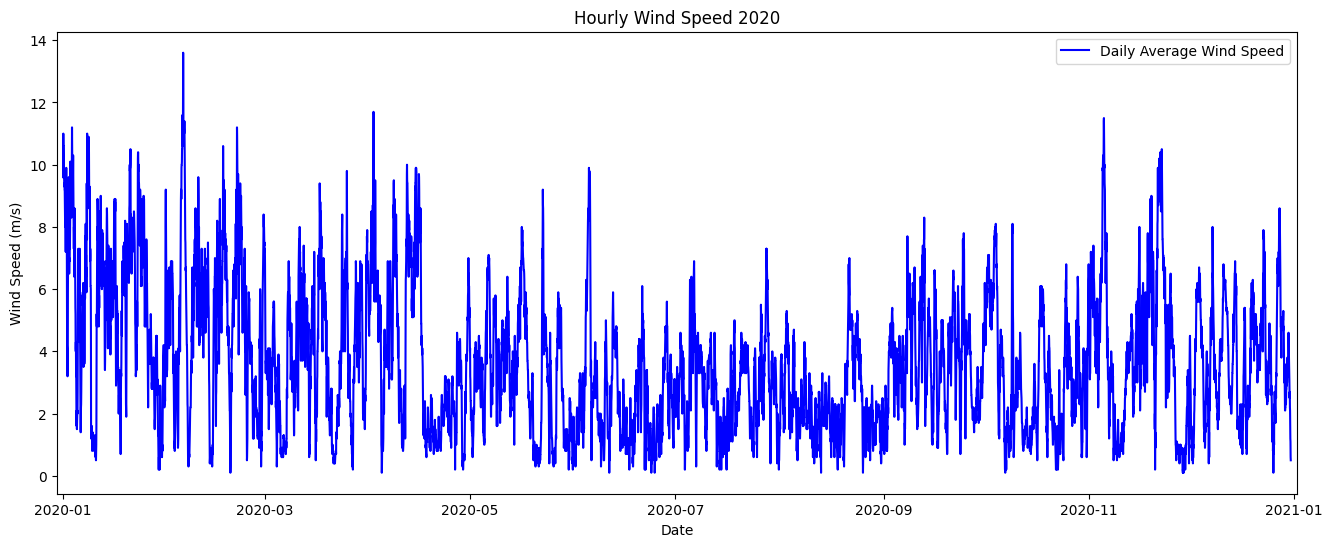

In [26]:
# Plotting wind_speed_10m (m/s)
# Plotting average wind speed for each day
plt.figure(figsize=(16, 6)) 

#daily_average_wind_speed = df.groupby(df["time"].dt.date)["wind_speed_10m (m/s)"].mean().reset_index()
# Using hue to represent wind speed intensity


sns.lineplot(data=df, x="time", y="wind_speed_10m (m/s)", color="blue", label="Daily Average Wind Speed")
plt.title("Hourly Wind Speed 2020")
plt.xlabel("Date")
plt.ylabel("Wind Speed (m/s)")
plt.margins(x=0.005)


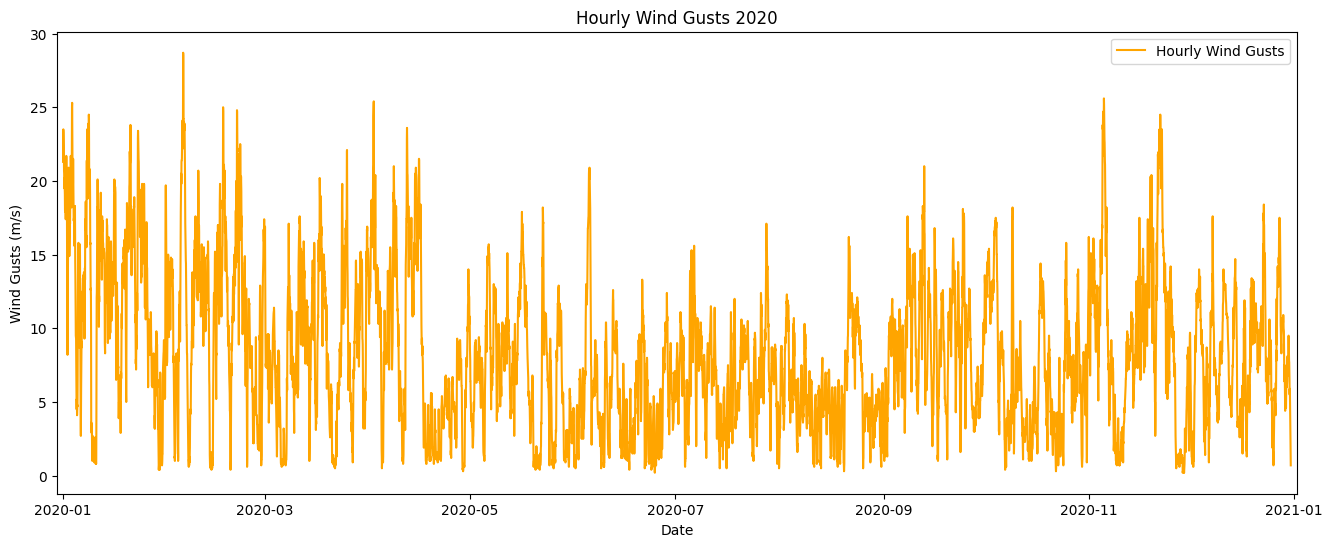

In [27]:
# Plotting wind_gusts_10m (m/s)
plt.figure(figsize=(16, 6))

sns.lineplot(data=df, x="time", y="wind_gusts_10m (m/s)", color="orange", label="Hourly Wind Gusts")
plt.title("Hourly Wind Gusts 2020")
plt.xlabel("Date")
plt.ylabel("Wind Gusts (m/s)")
plt.margins(x=0.005)


Text(0.5, 0, 'Wind Direction (°)')

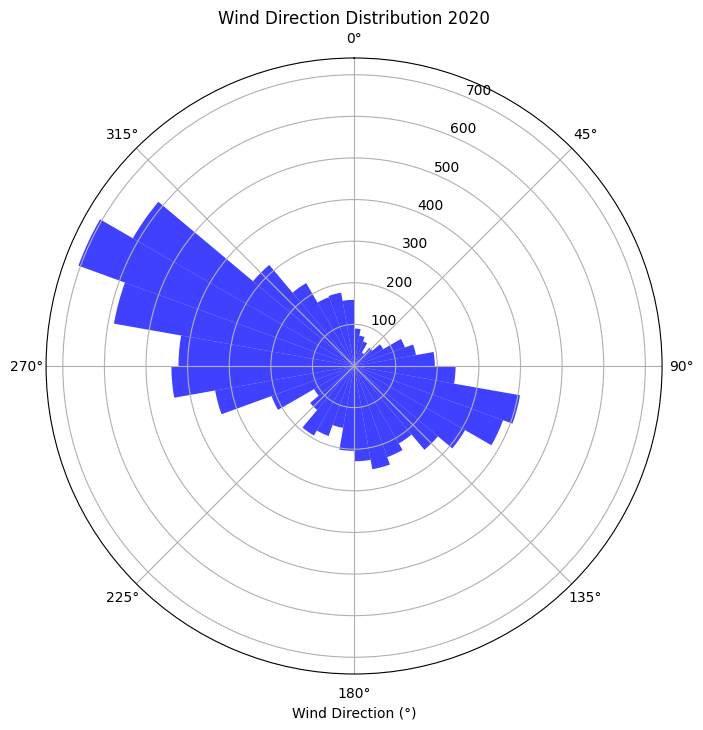

In [ ]:
# Plotting wind_direction_10m (°) using a polar plot
# This shows the count of occurrences for each wind direction in degrees over the year

angles = np.deg2rad(df["wind_direction_10m (°)"])


plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.hist(angles, bins=36, color="blue", alpha=0.75)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title("Wind Direction Distribution 2020")
ax.set_xlabel("Wind Direction (°)")

In [50]:
# Plotting all columns together for comparison

